# Wrangling of the BackOrder dataset
****
**Goal :** Prepare the backorder dataset for EDA and Modeling

Tasks to be performed :
+ Handling inconsistent column names and datatype
+ Missing Data handling
+ Removal of duplicate rows
+ Handling columns with repeatitive values
+ Handling the outliers
+ Write the clean data into a new file for further steps
 ****

+ Reference: https://www.kaggle.com/tiredgeek/predict-bo-trial

+ Data source: https://www.kaggle.com/tiredgeek/predict-bo-trial


In [1]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline  

In [2]:
df = pd.read_csv('../Backorder_train.csv')

C:\Users\deepa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [4]:
df.shape

(1687861, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk        

It looks like there are some columns with mixed data types (as also evident from the pandas warning while loading csv). We will need to identify and clean them up.
Some of the column names also need to be changed for better readability.


In [6]:
# Renaming columns
new_column_names =['product_id','current_inventory', 'transit_duration', 'transit_quantity',
                   'forecast_sales_3_months', 'forecast_sales_6_months', 'forecast_sales_9_months',
                   'prior_sales_1_month', 'prior_sales_3_month', 'prior_sales_6_month',
                   'prior_sales_9_month', 'minimum_recommended_stock', 'source_has_issue',
                   'source_overdue', 'source_performance_6_months', 'source_performance_12_months',
                   'stock_overdue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy',
                   'rev_stop', 'went_on_backorder']

df.columns = new_column_names

In [7]:
df.head()

,product_id,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,...,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [8]:
df.describe()

,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommended_stock,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [9]:
df.describe(include=['object'])

,product_id,source_has_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1687860,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,2,2,2,2,2,2,2
top,3277249,No,No,No,No,Yes,No,No
freq,1,1686953,1300377,1687615,1484026,1626774,1687129,1676567


In [10]:
#checking the nulls
df.isnull().sum()

product_id                           0
current_inventory                    1
transit_duration                100894
transit_quantity                     1
forecast_sales_3_months              1
forecast_sales_6_months              1
forecast_sales_9_months              1
prior_sales_1_month                  1
prior_sales_3_month                  1
prior_sales_6_month                  1
prior_sales_9_month                  1
minimum_recommended_stock            1
source_has_issue                     1
source_overdue                       1
source_performance_6_months          1
source_performance_12_months         1
stock_overdue                        1
deck_risk                            1
oe_constraint                        1
ppap_risk                            1
stop_auto_buy                        1
rev_stop                             1
went_on_backorder                    1
dtype: int64

Many of the columns have just a single null entry. Quite possible that all these NaN belong to same row which might be header or footer. If we will remove this row it will also solve the mix datatype issue which we saw during data load.

There are nulls and lots of 0's in each column. During the EDA/Feature engineering step we can determine if we want to omit or keep this column. But for now we will look for an approach to fill theses missing values.


In [11]:
df[df.current_inventory.isnull()]

,product_id,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,...,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.drop(1687860, inplace=True)

In [13]:
df.isnull().sum()

product_id                           0
current_inventory                    0
transit_duration                100893
transit_quantity                     0
forecast_sales_3_months              0
forecast_sales_6_months              0
forecast_sales_9_months              0
prior_sales_1_month                  0
prior_sales_3_month                  0
prior_sales_6_month                  0
prior_sales_9_month                  0
minimum_recommended_stock            0
source_has_issue                     0
source_overdue                       0
source_performance_6_months          0
source_performance_12_months         0
stock_overdue                        0
deck_risk                            0
oe_constraint                        0
ppap_risk                            0
stop_auto_buy                        0
rev_stop                             0
went_on_backorder                    0
dtype: int64

In [14]:
df.product_id = df.product_id.astype(int)

# Handling Nan and missing values
**Transit Duration** has 100894 null values.

Missing values in columns **source_performance_6_months** and **source_performance_12_months** are represented as **-99**. source_performance_6_months has  **129478** & source_performance_12_months has **122050** missing values.


Heatmap shows tha there is strong correlation between **source_performance_6_months** and **source_performance_12_months**. So, linear regression can be used to filing missing values. However another interesting point to note here is that many observations have both source_performance_12_months and  source_performance_6_months as null, so linear regression cannot fill such values and we need to see another approach there. Probably we would like now to check for the central tendency of the data and replace the null accordingly. It’s clearly visible from violin plot that data is not distributed normally. So we can pick median to fill remaining values
 
For **Transit Duration** I don't see correlation of this attribute with other features and also data is not distributed normally. So, again we can choose median to fill the nulls.

There is no dupicates in this dataset. We don't need to put eny effort in that front.


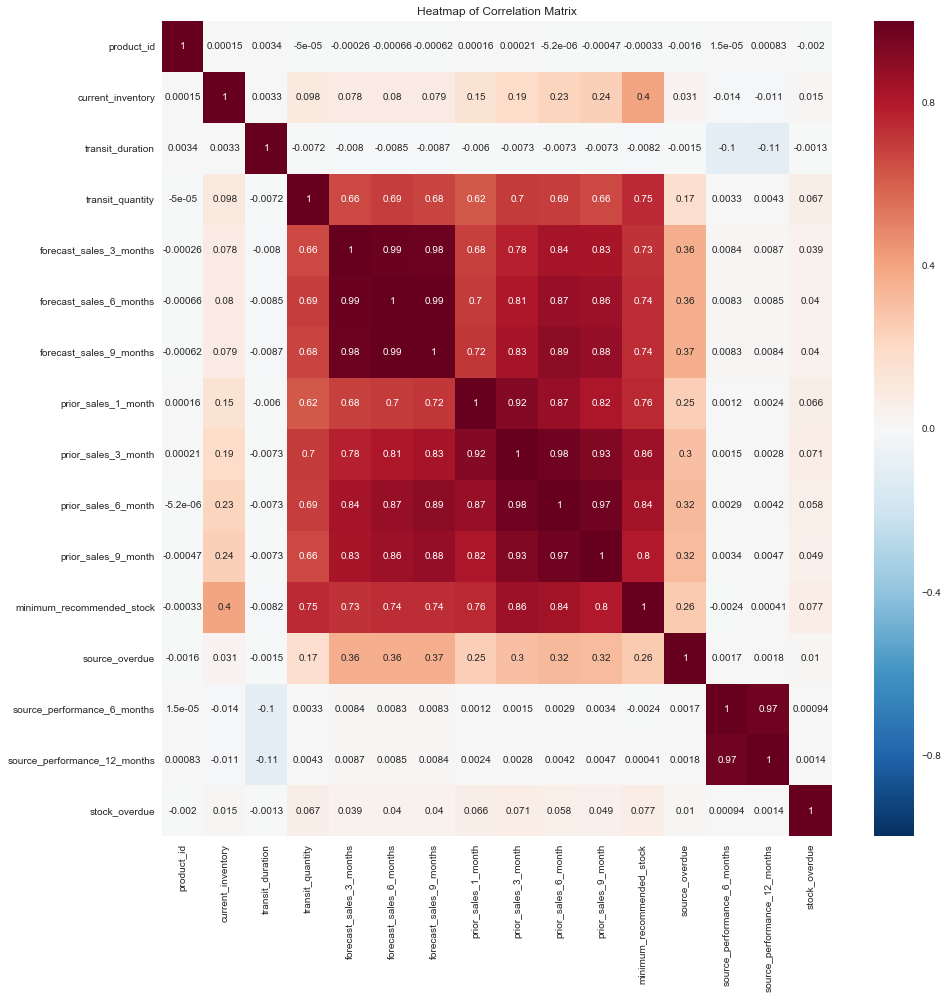

In [15]:
# Find the correlation 
fig, ax = plt.subplots(figsize=(15,15))
col_corr =df.corr()
sns.heatmap(col_corr, annot=True)
sns.plt.title('Heatmap of Correlation Matrix')

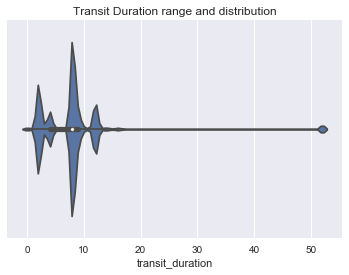

In [16]:
# View range and distribution
sns.violinplot(df.transit_duration)
sns.plt.title('Transit Duration range and distribution')

In [17]:
#Fill null with median value
df['transit_duration']=df.transit_duration.fillna(df.transit_duration.median())
df.transit_duration.isnull().sum()

0

In [18]:
df['transit_duration'].value_counts()

8.0     783079
2.0     337402
12.0    199700
4.0     128537
9.0     123649
52.0     30113
3.0      16253
10.0     14192
0.0      10511
14.0     10314
16.0      8843
13.0      5405
6.0       5365
5.0       4031
15.0      3812
17.0      3763
11.0      1094
20.0       416
30.0       312
18.0       221
7.0        209
22.0       133
24.0       115
26.0       105
28.0        84
21.0        49
40.0        48
35.0        35
19.0        28
1.0         21
23.0        14
25.0         7
Name: transit_duration, dtype: int64

In [19]:
#Checking for the duplicates
df.product_id.duplicated().sum()

0

In [20]:
# Replace -99 with Nan
df.source_performance_6_months.replace({-99.00:np.nan}, inplace=True)
df.source_performance_12_months.replace({-99.00:np.nan}, inplace=True)

In [21]:
(df.source_performance_6_months == -99.00).sum()

0

In [22]:
(df.source_performance_12_months == -99).sum()

0

In [23]:
#LinearRegression for filling the Nan 
X_12months = df[df.source_performance_6_months.notnull() & df.source_performance_12_months.notnull()][['source_performance_12_months']]
y_6months = df[df.source_performance_6_months.notnull() & df.source_performance_12_months.notnull()]['source_performance_6_months']

In [24]:
linReg = LinearRegression()
linReg.fit(X_12months,y_6months)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
#Predicted Nan values
test_12months = df[df.source_performance_6_months.isnull() & df.source_performance_12_months.notnull()][['source_performance_12_months']]
pred_6months = linReg.predict(test_12months)

In [26]:
# Fill the null values
reg_6_months_list = list(zip(test_12months.index,pred_6months))
for val in reg_6_months_list:
      df.set_value(index=val[0], value =val[1], col='source_performance_6_months')

In [27]:
#Check if the value is inserted
df.source_performance_6_months.isnull().sum()

122050

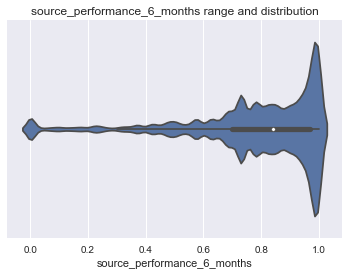

In [28]:
# View range and distribution
sns.violinplot(df.source_performance_6_months)
sns.plt.title('source_performance_6_months range and distribution')


In [29]:
#impute null with median
df.source_performance_6_months.fillna(df.source_performance_6_months.median(), inplace=True)

In [30]:
df.source_performance_6_months.isnull().sum()

0

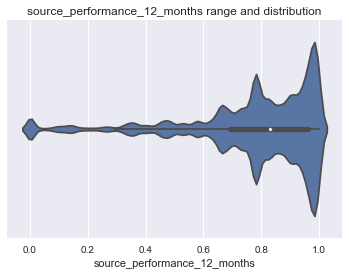

In [31]:
# View range and distribution
sns.violinplot(df.source_performance_12_months)
sns.plt.title('source_performance_12_months range and distribution')

In [32]:
#impute null with median
df.source_performance_12_months.fillna(df.source_performance_12_months.median(), inplace=True)
df.source_performance_12_months.isnull().sum()

0

# Handling repetitive values:

It seems there are many  0's in our dataset. Let's find out the **repetition of 0's **in each column. If any of the columns has more than 60%, 0 we can safely drop that column. This kind of data trend can be viewed on violinplot. 

</br>



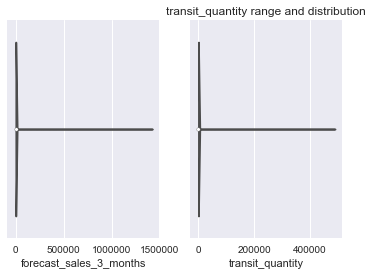

In [33]:
fig , ax1 = plt.subplots(ncols=2)
sns.violinplot(df.forecast_sales_3_months,   ax=ax1[0])
#sns.plt.title('transit_quantity range and distribution')

sns.violinplot(df.transit_quantity,  ax=ax1[1])
sns.plt.title('transit_quantity range and distribution')

In [34]:
# Calculate the repeatition of 0 in each column
perct_0  = {column: '%2.2f' % (((df[column] == 0).sum()/df.shape[0])*100)+'%' for column in df.columns if df[column].dtype == np.float64}


In [35]:
perct_0 

{'current_inventory': '6.42%',
 'forecast_sales_3_months': '69.78%',
 'forecast_sales_6_months': '64.23%',
 'forecast_sales_9_months': '61.22%',
 'minimum_recommended_stock': '51.68%',
 'prior_sales_1_month': '56.87%',
 'prior_sales_3_month': '44.98%',
 'prior_sales_6_month': '38.33%',
 'prior_sales_9_month': '34.72%',
 'source_overdue': '98.50%',
 'source_performance_12_months': '1.95%',
 'source_performance_6_months': '2.31%',
 'stock_overdue': '98.62%',
 'transit_duration': '0.62%',
 'transit_quantity': '79.67%'}

In [36]:
# Drop the column having more than 60% of 0's
df = df.drop(['forecast_sales_3_months','forecast_sales_6_months','forecast_sales_9_months','source_overdue','stock_overdue','transit_quantity'], axis=1)

In [37]:
df.shape

(1687860, 17)

# #Handling Outliers

Outliers are something we need to take care at each step. At this time, some of the outliers can be determined and handled by using the boxplot.
<br>



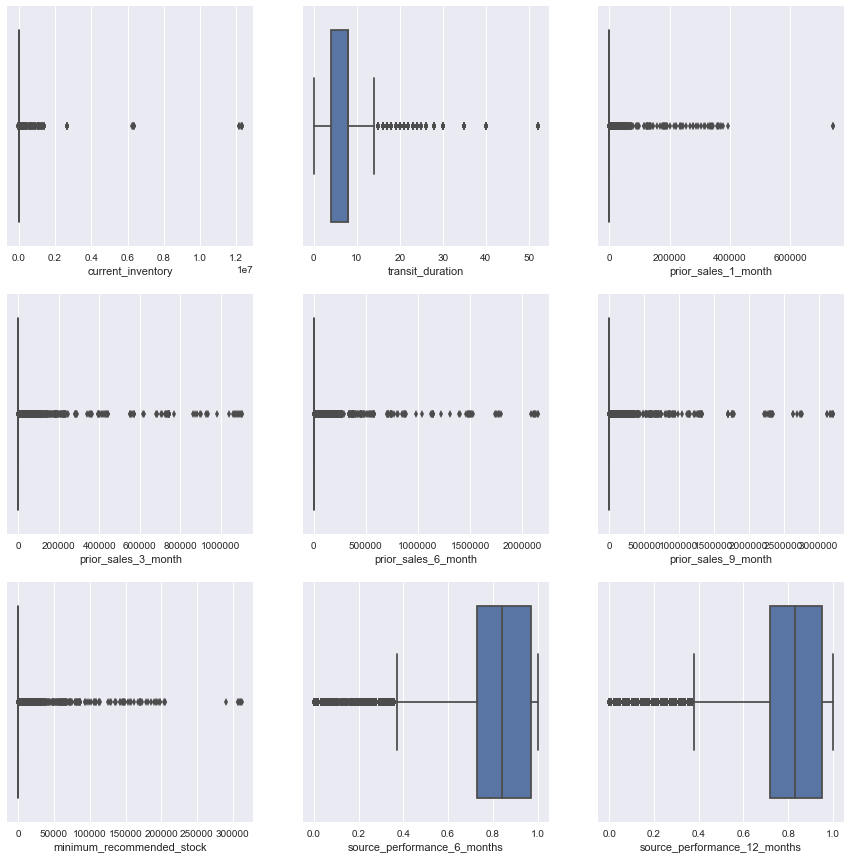

In [38]:
fig , ax1 = plt.subplots(nrows=3, ncols=3,figsize=(15,15) )
sns.boxplot(df.current_inventory, ax=ax1[0,0])
sns.boxplot(df.transit_duration, ax=ax1[0,1])
sns.boxplot(df.prior_sales_1_month,ax=ax1[0,2])
sns.boxplot(df.prior_sales_3_month, ax=ax1[1,0])
sns.boxplot(df.prior_sales_6_month, ax=ax1[1,1])
sns.boxplot(df.prior_sales_9_month, ax=ax1[1,2])
sns.boxplot(df.minimum_recommended_stock, ax=ax1[2,0])
sns.boxplot(df.source_performance_6_months, ax=ax1[2,1])
sns.boxplot(df.source_performance_12_months, ax=ax1[2,2])

#sns.violinplot(df.transit_duration,  ax=ax1[1])
#sns.plt.title('transit_quantity range and distribution')

Lets define a funtion to find the whisker values (in other words, upper and lower IQR boundaries for outliers

In [39]:
def get_outlier_boundaries(column):
    q75, q25  = np.percentile(column, [75,25])
    iqr = q75 - q25

    lower = q25 - 1.5 * iqr
    upper = q75 + 1.5 * iqr

    return lower,upper

In [40]:
transit_duration_upper = get_outlier_boundaries(df.transit_duration)[1]
outlier_transit_duration = df[df.transit_duration > transit_duration_upper]
print(outlier_transit_duration.shape)
outlier_transit_duration.went_on_backorder.value_counts()

(48098, 17)


No     47993
Yes      105
Name: went_on_backorder, dtype: int64

In [41]:
df = df.drop(outlier_transit_duration.index)

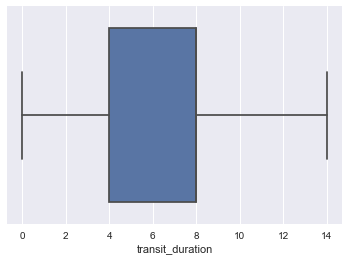

In [42]:
_ = sns.boxplot(df.transit_duration)

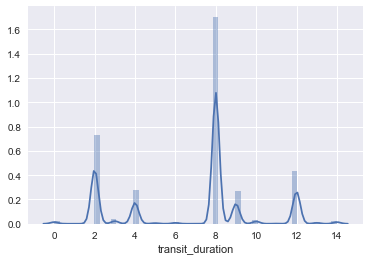

In [43]:
sns.distplot(df.transit_duration)

Lets looks at the prior_sales_9_month's data

In [52]:
fig, ax = get_outlier_boundaries(df.prior_sales_9_month)

(-70.5, 117.5)

In [65]:
# minimum_recommended_stock beyond 210000

outlier_minimum_recommended_stock = df[df.minimum_recommended_stock > 250000]
outlier_minimum_recommended_stock.shape


(7, 17)

In [66]:
#count is low so let's delete
df = df.drop(outlier_minimum_recommended_stock.index, errors='ignore')

In [69]:
# source_performance_6_months beyond 40

outlier_source_performance_6_months = df[df.source_performance_6_months <.3]
outlier_source_performance_6_months.shape
#Can not be deleted at this point of time

(90985, 17)

In [70]:
outlier_current_inventory = df[df.current_inventory> .2e07]
outlier_current_inventory.shape

(21, 17)

In [71]:
#count is low so let's delete
df = df.drop(outlier_current_inventory.index, errors='ignore')

In [72]:
df.shape

(1639734, 17)

Lets set the type as category for the categorical columns

In [73]:
for col in ['source_has_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']:
    df[col] = df[col].astype('category')

In [74]:
df.to_csv('../Backorder_clean.csv',index=False)

Our data is in a cleaner state now and saved in a file. We will pick-up this clean file for further
EDA. Some of data clean can be done during EDA too.
**********